# Prediction of Sales for Campaign Advertisement Using Linear Regression Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Visualizing the relationship between Advertising channels(TV, Radio and Newspaper) and Sales

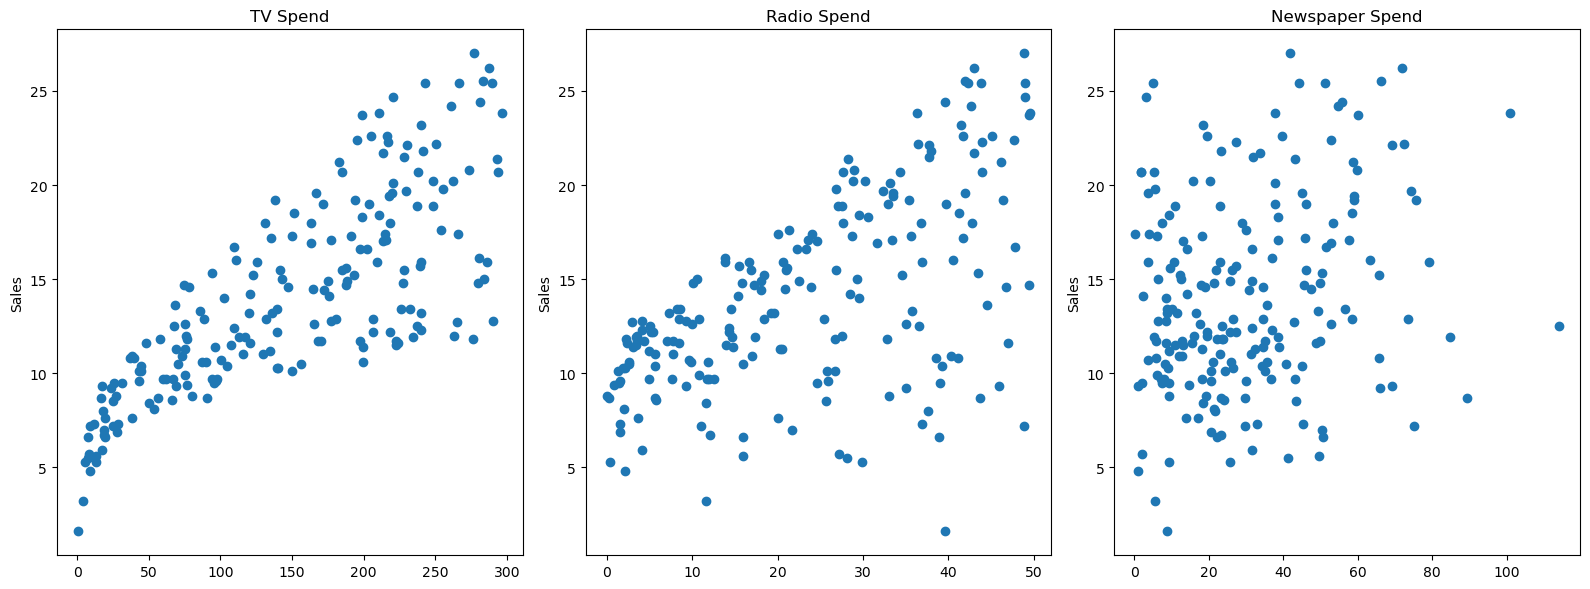

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')
plt.tight_layout();

* The higher amounts of Radio spend result in higher Sales.
* The sales are more likely to increase as the TV advertising expenditure increases.
* For the Newspaper, it is little less clear if really increasing newspapers spend results in higher sales.
* No real relationship between Newspaper spend and Sale, it almost looks random.

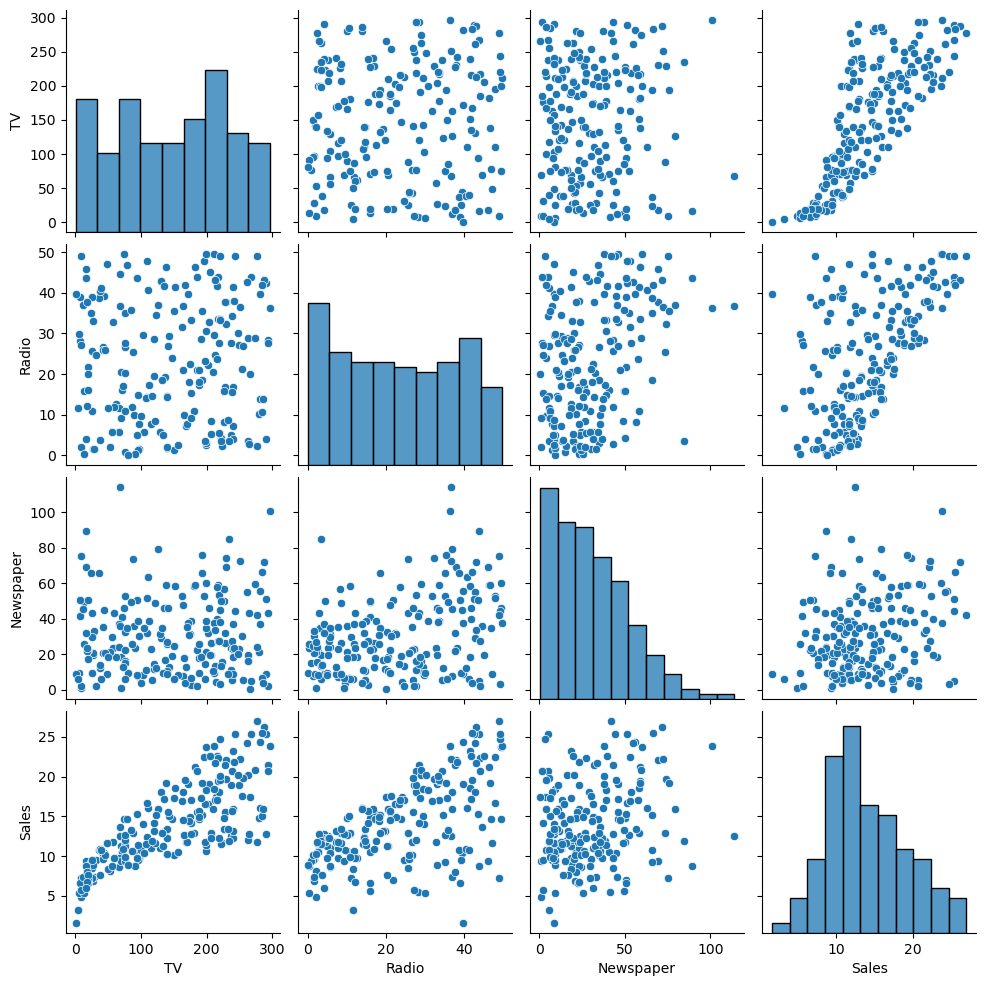

In [6]:
sns.pairplot(df)

### Features

In [7]:
X = df.drop('Sales', axis=1)

In [8]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Label

In [9]:
y = df[['Sales']]
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Splitting data into training and testing

* Features: X_train, X_test
* Label(predicted): y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


In [12]:
df.shape

(200, 4)

In [13]:
#help(LinearRegression)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#predictions = model.predict(X_test)
# Compare model.predict(X_test) to y_test

In [17]:
#X_test.head()

In [18]:
#y_test

In [19]:
test_predict = model.predict(X_test)
test_predict

array([[16.4080242 ],
       [20.88988209],
       [21.55384318],
       [10.60850256],
       [22.11237326],
       [13.10559172],
       [21.05719192],
       [ 7.46101034],
       [13.60634581],
       [15.15506967],
       [ 9.04831992],
       [ 6.65328312],
       [14.34554487],
       [ 8.90349333],
       [ 9.68959028],
       [12.16494386],
       [ 8.73628397],
       [16.26507258],
       [10.27759582],
       [18.83109103],
       [19.56036653],
       [13.25103464],
       [12.33620695],
       [21.30695132],
       [ 7.82740305],
       [ 5.80957448],
       [20.75753231],
       [11.98138077],
       [ 9.18349576],
       [ 8.5066991 ],
       [12.46646769],
       [10.00337695],
       [21.3876709 ],
       [12.24966368],
       [18.26661538],
       [20.13766267],
       [14.05514005],
       [20.85411186],
       [11.0174441 ],
       [ 4.56899622]])

To compare test_predict to y_test

There are 3 ways to do that
* Mean absolute error
* Mean squared error
* Root mean squared error

In [20]:
#y_test.head()

### Evaluating Linear Regression

* Regression is a task when a model attempts to predict continuous values
* Example: Prediction of house price

### Compare test_predict to y_test

#### Find the average sale value

In [21]:
df['Sales'].mean()

14.0225

<Axes: xlabel='Sales', ylabel='Count'>

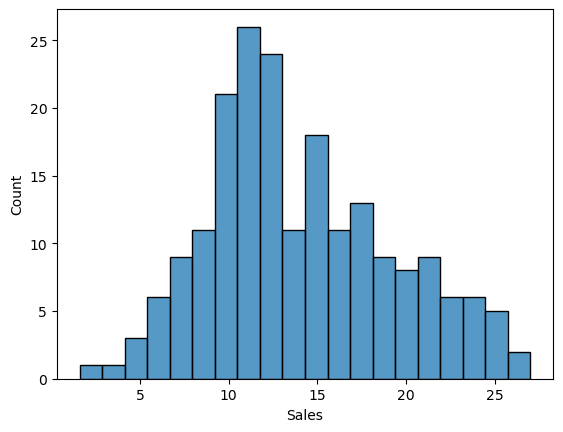

In [22]:
sns.histplot(x = 'Sales', data=df, bins=20)

In [23]:
mean_absolute_error(y_test, test_predict)

1.4607567168117606

In [24]:
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, test_predict)))

Mean Absolute Error: 1.4607567168117606


* Compare 14.0225 to 1.46: like 10.5% error range
* Base on the data, the performance of the model(Linear Regression) on data it is never seen before on average is going to be off by 1.46 which is small (less than 10.5%) when compare to average Sales values(14.0225)

#### RMSE

In [25]:
np.sqrt(mean_squared_error(y_test, test_predict))

1.7815996615334502

### Evaluating Residuals

* Linear regression may not be sometimes an appropriate model depending on the dataset.
* Next: Explore residual plot to determine whether is good to us e linear regression or not for our dataset
* Using Anscombe's quartet

#### Plot residuals Vs y_test

If the model is perfect, it means all the expected vslues would be zero.

In [28]:
test_residuals = y_test-test_predict

In [31]:
#print(test_residuals)

<Axes: xlabel='Sales', ylabel='Sales'>

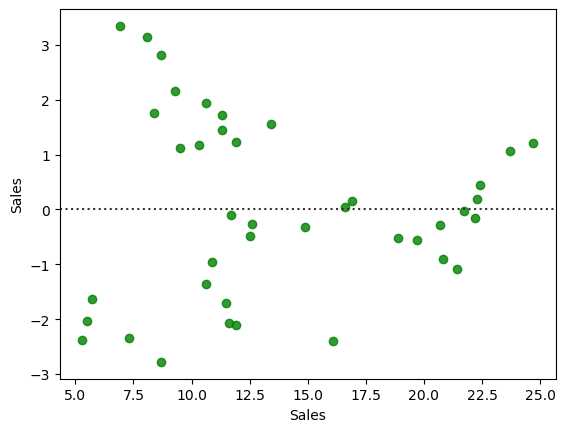

In [36]:
sns.residplot(x = y_test, y = test_residuals, color='green')
#plt.axhline(y= 0, color= 'r', ls= '--')

* Linear regression is a valid choice model for the dataset because there is no clear curve or pattern and the points are pretty random
* The mean absolute value and the root mean squared error values are good enough to retrain the model on all the data and deploy it to the real world.

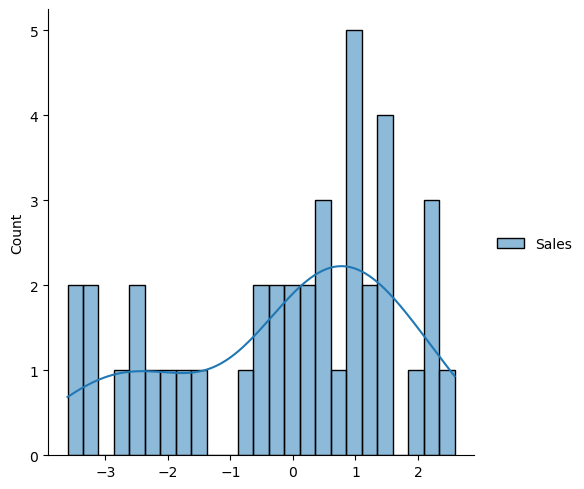

In [37]:
sns.displot(test_residuals, bins=25, kde=True)

### Model Deployment and Coefficient Interpretation

In [38]:
final_model = LinearRegression()

In [39]:
final_model.fit(X, y)

LinearRegression()

In [40]:
final_model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

In [41]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


* Coefficient for TV Spend= 0.04576465
* Coefficient for Radio Spend= 0.18853002
* Coefficient of TV and Radio spend are positive that means they are good relationship with amount spend and Radio has a bit greater effect
* Coefficient for Newspaper Spend= -0.00103749  
* Since the coefficient for Newspaper spend is very close to zero which mean regardless of what you spend on newspaper advertising, the model will give a weight of zero i.e.it will completely cancel out any value that you spend on newspaper advertising and lower the total sales because Nwspaper Coefficient is very small negative number close to zero(-0.00103749) which means Newspaer should be dropped, it's kind of not worth the effort.
* And the final model also shows that there is no real relationship between Newspaper spend and Sale, it almost looks random.

#### Interpretation of coefficient

* Holding all other features fixed, a 1 unit(one thousand dollars) increase in TV Spend is associated with an increase in sales of 0.045 'sales units', in this case 1000s units.
* Meaning: For every (one thousand dollars) spend on TV Ads, we would expect 45 more units sold

* Holding all other features fixed, a 1 unit(one thousand dollars) increase in Radio Spend is associated with an increase in sales of 0.188 'sales units', in this case 1000s units.
* Meaning: For every (one thousand dollars) spend on Radio Ads, we would expect 188 more units sold

* Holding all other features fixed, a 1 unit(one thousand dollars) increase in Newspaper Spend is associated with an decrease in sales of 0.045 'sales units', in this case 1000s units.
* Meaning: For every (one thousand dollars) spend on Newspaper Ads, we would expect tosell 1 less unit. 
* The Newspaper spend has no real effect on sales since its coefficient is very close to zero(0).

In [42]:
y_hat = final_model.predict(X)

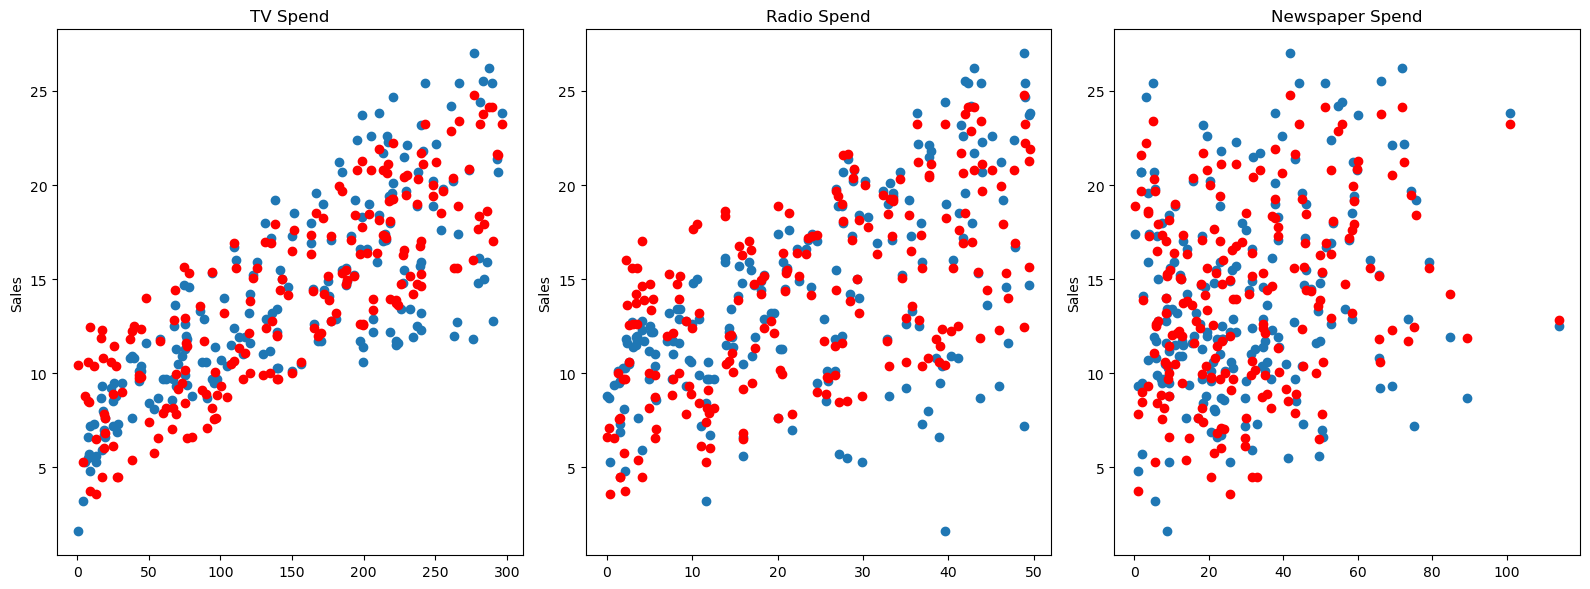

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['Sales'], 'o') #Plot TV vs Sales i.e. real data point
axes[0].plot(df['TV'], y_hat, 'o', color='red') # Plot true data TV and predicted point y_hat
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')
plt.tight_layout();

### Deploying model to the world

In [46]:
from joblib import dump, load

In [47]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [48]:
loaded_model = load('final_sales_model.joblib')

In [49]:
loaded_model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Final Test: Predict the Sales value for some Campaign

In [50]:
X.shape

(200, 3)

#### Imaginary Campaign: 

New Campaigns to run:
* Spend 149 units on TV
* Spend 22 units on Radio
* Spend 12 units on newpaper
* What is the Sale to get from each Campaign

In [51]:
campaign = [[149, 22, 12]]

In [52]:
loaded_model.predict(campaign)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.893032]])

* Expectation: We get 13.893032 units of sales for the campaign

Imaginary Campaign:

* New Campaigns to run:

* Spend 204 units on TV
* Spend 125 units on Radio
* Spend 302 units on newpaper
* What is the Sale to get from each Campaign

In [53]:
campaign = [[204, 125, 302]]

In [54]:
loaded_model.predict(campaign)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[35.52780626]])

In [55]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
campaign = [[180.8, 10.8, 58.4]]

In [59]:
loaded_model.predict(campaign)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.18867186]])